# Inferenza su Ising 2D e random graph

Minicorso: "Problema di Ising inverso" 

Prof. Luca Leuzzi

A.A. 2022-2023

Notebook scritto da Dario Bocchi (bocchi.2019986@studenti.uniroma1.it)

Tempo di esecuzione: 
- 05:20 (con download della repository github)
- 02:30 (senza download)


## Caricamento dei dati

In [26]:
 #Eseguiamo questa cella solo se si sta utilizzando il notebook da Google Colab (impiega circa 2 minuti)
 #In caso contrario i dati sono già nella cartella della repository
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

 #Scarichiamo l'intera repository da github
if IN_COLAB:
    !git clone https://github.com/bsfn1844815/mf_inference
    %cd mf_inference/Ising

Cloning into 'mf_inference'...
remote: Enumerating objects: 443, done.
remote: Total 443 (delta 0), reused 0 (delta 0), pack-reused 443
Receiving objects: 100% (443/443), 980.32 MiB | 21.46 MiB/s, done.
Resolving deltas: 100% (289/289), done.
Updating files: 100% (296/296), done.
/content/mf_inference/Ising/mf_inference/Ising


In [27]:
#Import delle librerie necessarie

import numpy as np #Per l'analisi
import matplotlib.pyplot as plt #Per fare i grafici

In [28]:
#Funzione per caricare i dati del lattice 2D
def load_lattice_data(T, L, is_dis):
    #Usiamo solo la seconda metà delle configurazioni (asspettiamo la termalizzazione)
    data = np.loadtxt("data_lattice/config_L{}_T{:.2f}_{}.dat".format(L, T, ["ord", "dis"][is_dis]))[100000:]
    J0 = np.loadtxt("data_lattice/interaction_L{}_T{:.2f}_{}.dat".format(L, T, ["ord", "dis"][is_dis]))
    return(data, J0)

#Funzione per caricare i dati dei random graph
def load_graph_data(T, N, is_dis, p=0.04):
    #Usiamo solo la seconda metà delle configurazioni (asspettiamo la termalizzazione)
    data = np.loadtxt("data_graph/config_N{}_T{:.2f}_p{:.2f}_{}.dat".format(N, T, p, ["ord", "dis"][is_dis]))[100000:]
    J0 = np.loadtxt("data_graph/interaction_N{}_T{:.2f}_p{:.2f}_{}.dat".format(N, T, p, ["ord", "dis"][is_dis]))
    return(data, J0)

Questa cella carica i dati del lattice (da commentare se si vogliono usare i dati dei random graph)

In [29]:
#T = 5.2 #Tempeartura
#is_dis = True #True se i couplings sono random (i.e. il modello è disordinato), False per il modello ordinato
#L = 10 #lato del reticolo
#
#data, J0 = load_lattice_data(T, L, is_dis)
#print("Data shape: ", data.shape)
#print("J0 shape: ", J0.shape)

Questa cella carica i dati dei random graph (da commentare se si vogliono usare i dati del lattice)

In [30]:
T = 5.2 #Tempeartura
is_dis = True #True se i couplings sono random (i.e. il modello è disordinato), False per il modello ordinato
N = 100 #Numero di spin

data, J0 = load_graph_data(T, N, is_dis)
print("Data shape: ", data.shape)
print("J0 shape: ", J0.shape)

Data shape:  (100000, 100)
J0 shape:  (100, 100)


Guardiamo qualche esempio di configurazione.

Le rappresentiamo in un reticolo 10x10, ricordando che per i random graph questa rappresentazione non ha significato fisico.

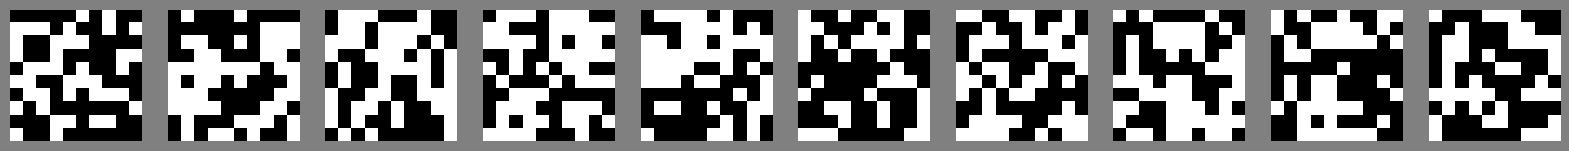

In [31]:
fig, axs = plt.subplots(1, 10, figsize=((20, 3)))
for i in range(10):
    axs[i].imshow(data[np.random.randint(0, data.shape[0])].reshape((10,10)), cmap="gray")
    axs[i].axis('off')
fig.set_facecolor('gray')
plt.show()

## Inferenza: mean field

Calcoliamo la matrice di covarianza $\mathcal{C}$ delle configurazioni.

Per il lattice la numerazione degli spin è scelta in modo che ogni spin i interagisca con:

- i-1, ossia lo spin a sinistra
- i+1, ossia lo spin a destra
- i-L, ossia lo spin sopra
- i+L, ossia lo spin sotto

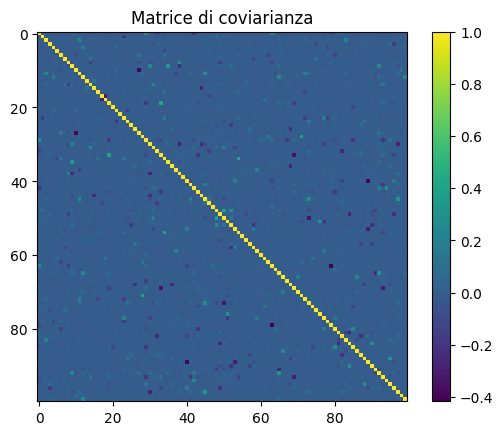

In [32]:
cov_matrix = np.cov(data.T)
plt.imshow(cov_matrix)
plt.colorbar()
plt.title("Matrice di coviarianza")
plt.show()

Utilizziamo quindi questa matrice per ottenere la matrice dei couplings:

$\beta J_{1} = - \mathcal{C}^{-1}$ dove $\beta = 1/T$

In [33]:
cov_inv = np.linalg.inv(cov_matrix)
np.fill_diagonal(cov_inv, 0)

J1 = -cov_inv * T

Compariamo ora $J_{0}$ (i veri couplings) con $J_{1}$ (i couplings inferiti)

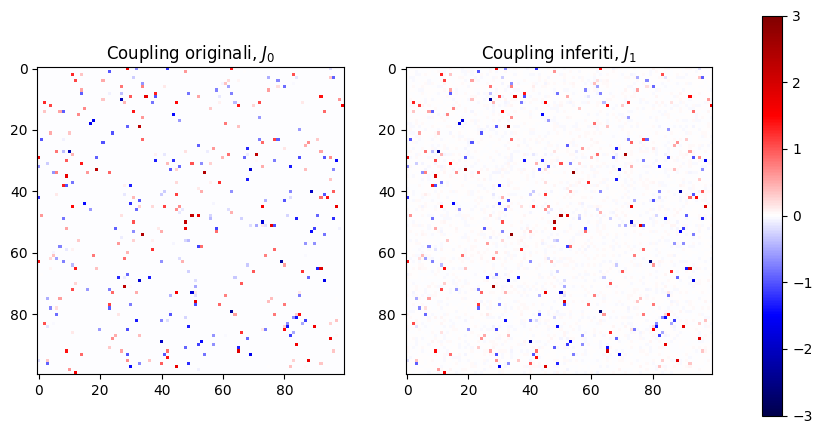

In [34]:
if is_dis:
    fig, axs = plt.subplots(1,2, figsize=((10,10)))
    f1=axs[0].imshow(J0, cmap="seismic", vmin=-3, vmax=3)
    axs[0].set_title(r"Coupling originali, $J_0$")
    f2=axs[1].imshow(J1, cmap="seismic", vmin=-3, vmax=3)
    axs[1].set_title(r"Coupling inferiti, $J_1$")
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.3, 0.02, 0.4])
    fig.colorbar(f1, cax=cbar_ax)
    plt.show()
else:
    fig, axs = plt.subplots(1,2, figsize=((10,10)))
    f1=axs[0].imshow(J0, cmap="Reds", vmin=0, vmax=1.5)
    axs[0].set_title(r"Coupling originali, $J_0$")
    f2=axs[1].imshow(J1, cmap="Reds", vmin=0, vmax=1.5)
    axs[1].set_title(r"Coupling inferiti, $J_1$")
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.3, 0.02, 0.4])
    fig.colorbar(f1, cax=cbar_ax)
    plt.show()

## Errore in funzione della temperatura

Per valutare la bontà dei couplings $J_{1}$ possiamo calcolare la quantità $\gamma = \sqrt{\frac{\sum_{ij}(J_{0, ij} - J_{1, ij})^2}{\sum_{ij}J_{0, ij}^2}}$

In [35]:
T_array = np.arange(1.0, 7.0, 0.3) #Creiamo un'array di temperature 

S_array = np.zeros((len(T_array), 100000, 100)) #Placeholder per le configurazioni
J0_array = np.zeros((len(T_array), 100, 100)) #Placeholder per gli J0
J1_array = np.zeros((len(T_array), 100, 100)) #Placeholder per gli J1

gamma_array = np.zeros((len(T_array))) #Placeholder per i gamma

Calcoliamo $\gamma$ in funzione di T

In [36]:
for i in range(len(T_array)):
    T = T_array[i]
    S_array[i], J0_array[i] = load_lattice_data(T, L=10, is_dis=False)
    cov_matrix = np.cov(S_array[i].T)
    cov_inv = np.linalg.inv(cov_matrix)
    np.fill_diagonal(cov_inv, 0)
    J1_array[i] = -cov_inv * T
    gamma_array[i] = np.sqrt(np.sum((J0_array[i] - J1_array[i])**2) / np.sum(J0_array[i]**2))

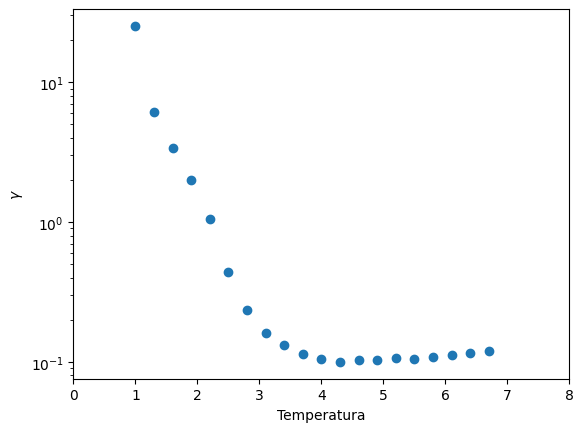

In [37]:
fig, axs = plt.subplots(1,1)
plt.scatter(T_array, gamma_array)
plt.xlim(0, 8)
plt.xlabel("Temperatura")
plt.ylabel("$\gamma$")
plt.yscale("log")
plt.show()